# British Airways Customer Reviews Analysis

This Jupyter notebook analyzes customer reviews for British Airways flights. We'll explore various aspects of the reviews, including ratings, recommendations, seat types, and more.

## Data Import and Preprocessing

First, let's import the necessary libraries and load our data:

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

Load the dataset

In [153]:
df=pd.read_csv('ba_reviews.csv')

Let's take a look at the first few rows of our dataset and get some basic information:

In [154]:
df.head(5)

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,service was mediocre at best,Gary Storer,03/10/2023,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,01/10/2023,no,Not Verified,2,2,3,1,2,2,-1
1,BA standards continue to decline,A Jensen,02/10/2023,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,01/09/2023,no,Verified,2,2,1,2,1,1,-1
2,"won the race to the bottom""",John Rockett,02/10/2023,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,01/09/2023,no,Not Verified,2,2,3,2,1,1,-1
3,Not a reliable airline,Tatiana Bobrovskaya,02/10/2023,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,01/10/2023,no,Verified,3,4,4,2,1,1,-1
4,Very disappointed,Tom Slowbe,28/09/2023,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,01/09/2023,no,Verified,1,1,4,4,3,2,3


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   header               1324 non-null   object
 1   author               1324 non-null   object
 2   date                 1324 non-null   object
 3   place                1324 non-null   object
 4   content              1324 non-null   object
 5   aircraft             1324 non-null   object
 6   traveller_type       1323 non-null   object
 7   seat_type            1324 non-null   object
 8   route                1324 non-null   object
 9   date_flown           1324 non-null   object
 10  recommended          1324 non-null   object
 11  trip_verified        1324 non-null   object
 12  rating               1324 non-null   int64 
 13  seat_comfort         1324 non-null   int64 
 14  cabin_staff_service  1324 non-null   int64 
 15  food_beverages       1324 non-null   int64 
 16  ground

Now, we'll clean our data by removing any rows with missing values and dropping duplicates:

In [156]:
df=df.dropna()
df=df.drop_duplicates()

We'll convert the 'date' and 'date_flown' columns to datetime format for easier analysis:

In [157]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['date_flown'] = pd.to_datetime(df['date_flown'], format='%d/%m/%Y')

Let's check the number of unique values in each column and get some basic statistics:

In [158]:
df.nunique()

header                 1299
author                  832
date                    937
place                    56
content                1323
aircraft                150
traveller_type            4
seat_type                 4
route                   836
date_flown               88
recommended               2
trip_verified             2
rating                   10
seat_comfort              6
cabin_staff_service       6
food_beverages            6
ground_service            6
value_for_money           5
entertainment             6
dtype: int64

In [159]:
df.describe().round()

,date,date_flown,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
count,1323,1323,1323.0,1323.0,1323.0,1323.0,1323.0,1323.0,1323.0
mean,2018-12-17 17:52:06.530612224,2018-11-16 15:46:56.326530560,4.0,3.0,3.0,2.0,3.0,3.0,1.0
min,2016-03-23 00:00:00,2015-05-01 00:00:00,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
25%,2017-04-20 12:00:00,2017-04-01 00:00:00,1.0,2.0,2.0,1.0,2.0,1.0,-1.0
50%,2018-05-14 00:00:00,2018-05-01 00:00:00,3.0,3.0,4.0,2.0,3.0,3.0,1.0
75%,2019-11-17 00:00:00,2019-11-01 00:00:00,7.0,4.0,5.0,4.0,4.0,4.0,3.0
max,2023-10-03 00:00:00,2023-10-01 00:00:00,10.0,5.0,5.0,5.0,5.0,5.0,5.0
std,NaN,NaN,3.0,1.0,2.0,2.0,1.0,1.0,2.0


Finally, let's make sure we've handled all null values and check our dataset info again:

In [160]:
df.isnull().sum()

header                 0
author                 0
date                   0
place                  0
content                0
aircraft               0
traveller_type         0
seat_type              0
route                  0
date_flown             0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   header               1323 non-null   object        
 1   author               1323 non-null   object        
 2   date                 1323 non-null   datetime64[ns]
 3   place                1323 non-null   object        
 4   content              1323 non-null   object        
 5   aircraft             1323 non-null   object        
 6   traveller_type       1323 non-null   object        
 7   seat_type            1323 non-null   object        
 8   route                1323 non-null   object        
 9   date_flown           1323 non-null   datetime64[ns]
 10  recommended          1323 non-null   object        
 11  trip_verified        1323 non-null   object        
 12  rating               1323 non-null   int64         
 13  seat_comfort         1323 non-null   i

## Data Visualization and Analysis

### Rating Distribution

Let's visualize the distribution of ratings:

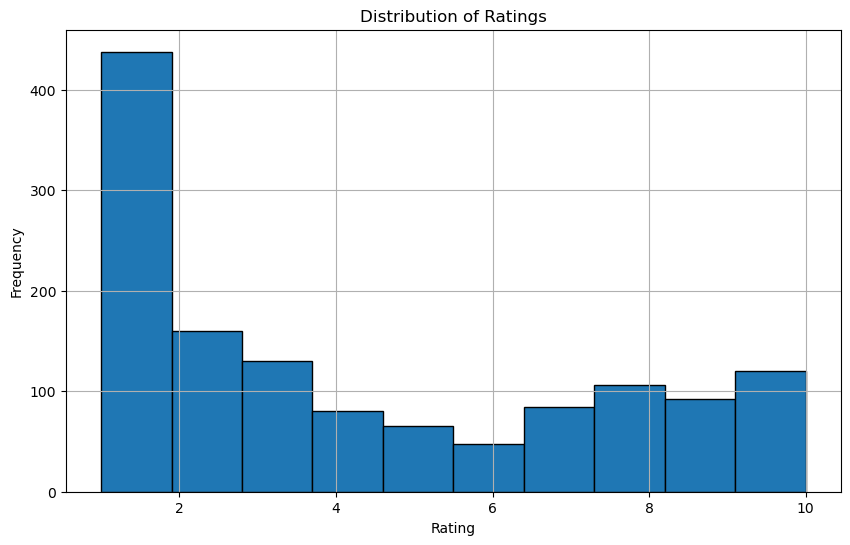

In [162]:
plt.figure(figsize=(10,6))
df['rating'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Recommendation Analysis

Now, let's look at the count of recommendations:

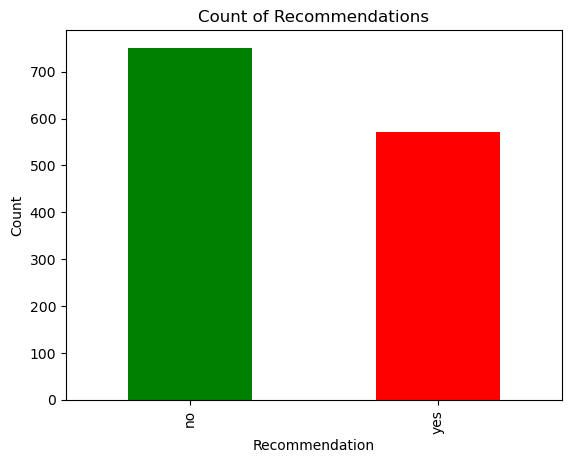

In [163]:
recommend_counts = df['recommended'].value_counts()
recommend_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Count of Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.show()

### Seat Type Analysis

Let's analyze the average rating by seat type:

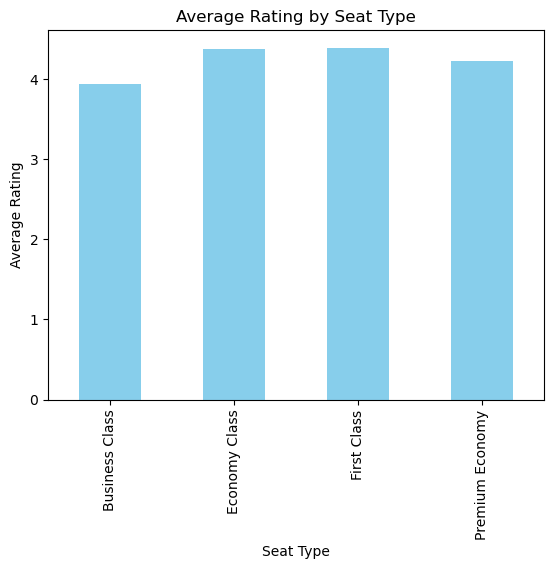

In [164]:
avg_rating_seat = df.groupby('seat_type')['rating'].mean()
avg_rating_seat.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Rating')
plt.show()

In [165]:
traveller_seat_ratings = df.groupby(['traveller_type', 'seat_type'])['rating'].mean().unstack()
traveller_seat_ratings

seat_type,Business Class,Economy Class,First Class,Premium Economy
traveller_type,,,,
Business,4.168919,4.254098,5.277778,3.357143
Couple Leisure,4.113990,4.405556,4.285714,4.184211
Family Leisure,3.833333,3.765306,5.666667,2.583333
Solo Leisure,3.330189,4.699507,3.440000,5.055556


We can also create a heatmap to visualize average ratings by traveller type and seat type:


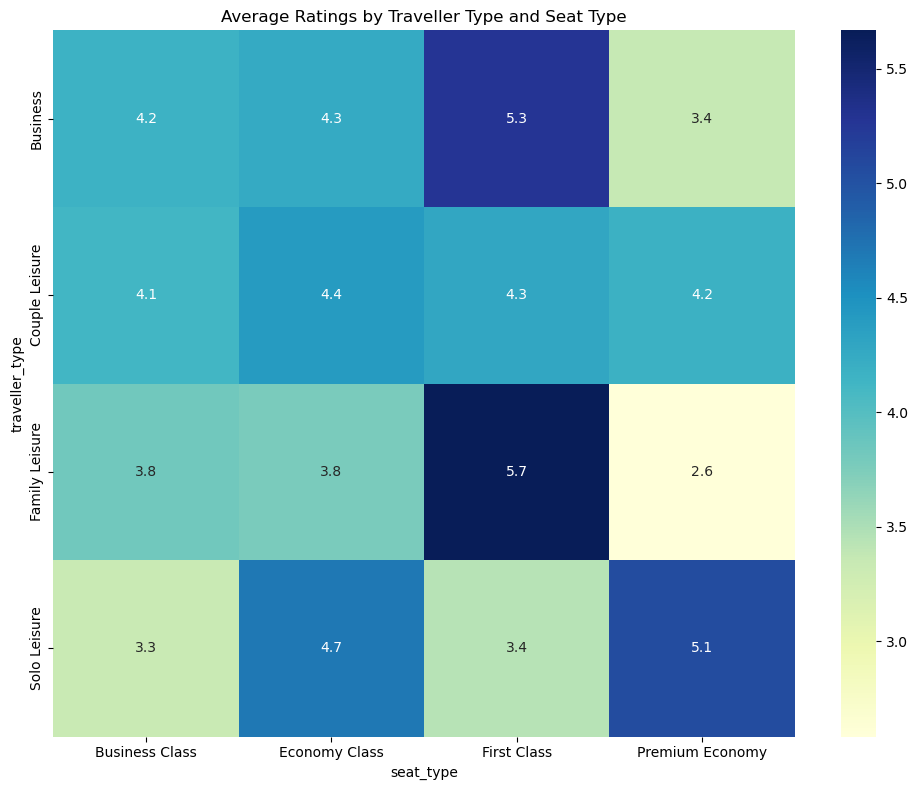

In [166]:
plt.figure(figsize=(10, 8))
sns.heatmap(traveller_seat_ratings, annot=True, cmap='YlGnBu')
plt.title('Average Ratings by Traveller Type and Seat Type')
plt.tight_layout()
plt.show()

### Detailed Seat Type Analysis

Let's analyze various aspects of different seat types:

In [167]:
seat_type_analysis = df.groupby('seat_type')[['seat_comfort', 'cabin_staff_service', 'food_beverages', 'ground_service', 'value_for_money', 'entertainment']].mean()
seat_type_analysis

,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
seat_type,,,,,,
Business Class,2.848303,3.407186,2.818363,3.001996,2.748503,1.305389
Economy Class,2.742952,3.112769,1.893864,2.993367,2.776119,1.106136
First Class,3.563218,3.862069,3.045977,3.229885,2.965517,2.747126
Premium Economy,3.090909,3.196970,2.522727,3.204545,2.787879,2.575758


We'll create a spider plot to visualize these aspects for each seat type:

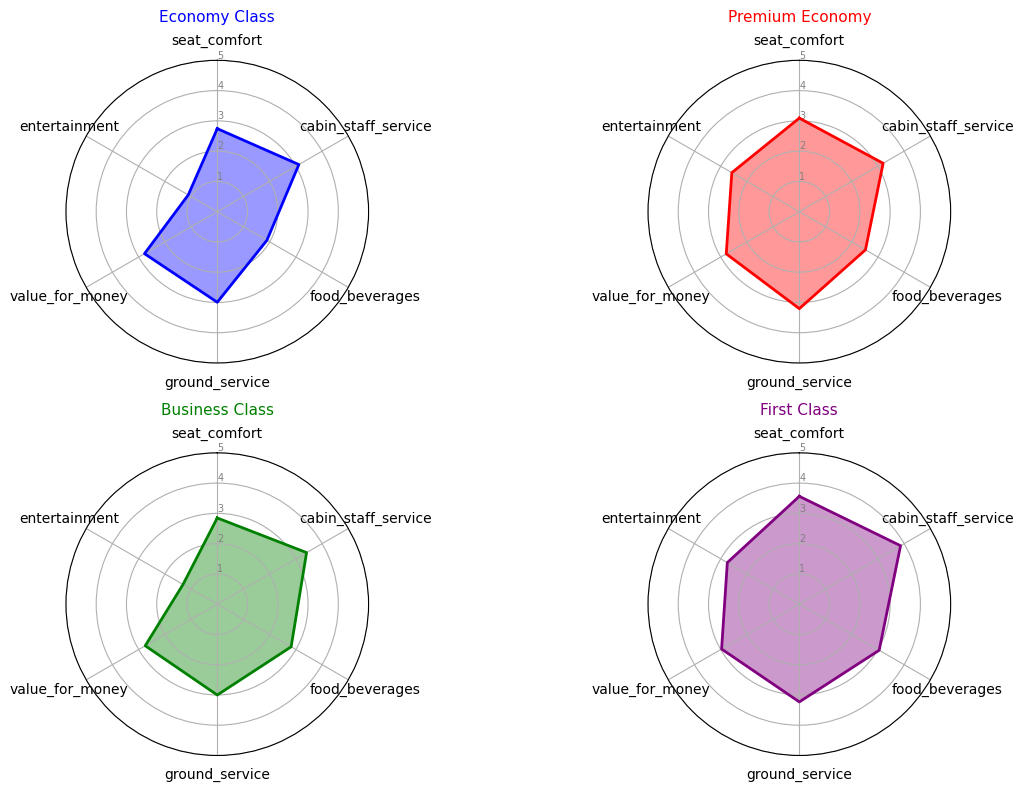

In [168]:
def make_spider(row, title, color):
  categories = list(seat_type_analysis.columns)
  N = len(categories)
  angles = [n / float(N) * 2 * np.pi for n in range(N)]
  angles += angles[:1]
  
  ax = plt.subplot(2, 2, row + 1, polar=True)
  ax.set_theta_offset(np.pi / 2)
  ax.set_theta_direction(-1)
  plt.xticks(angles[:-1], categories)
  ax.set_rlabel_position(0)
  plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
  plt.ylim(0, 5)
  
  values = seat_type_analysis.loc[title].values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
  plt.title(title, size=11, color=color, y=1.1)

plt.figure(figsize=(12, 8))
make_spider(0, "Economy Class", "blue")
make_spider(1, "Premium Economy", "red")
make_spider(2, "Business Class", "green")
make_spider(3, "First Class", "purple")
plt.tight_layout()
plt.show()

### Verified vs Non-Verified Trips

Let's compare verified and non-verified trips:

Comparison of Verified vs Non-Verified Trips:
                 rating  seat_comfort  cabin_staff_service  food_beverages  \
trip_verified                                                                
Not Verified   3.568807      2.733945             3.266055        2.385321   
Verified       4.247117      2.883855             3.283361        2.382208   

               value_for_money  
trip_verified                   
Not Verified          2.770642  
Verified              2.780066  


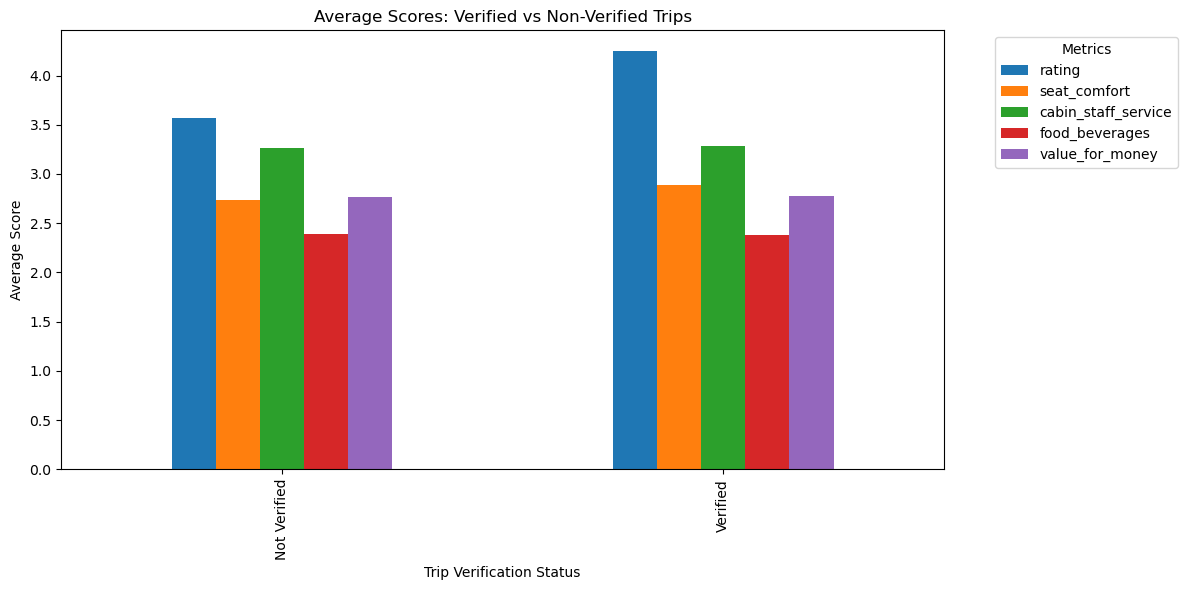

In [169]:
verified_comparison = df.groupby('trip_verified')[['rating', 'seat_comfort', 'cabin_staff_service', 'food_beverages', 'value_for_money']].mean()
print("Comparison of Verified vs Non-Verified Trips:")
print(verified_comparison)


verified_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Average Scores: Verified vs Non-Verified Trips')
plt.xlabel('Trip Verification Status')
plt.ylabel('Average Score')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Time Series Analysis

Let's look at how ratings change over time:

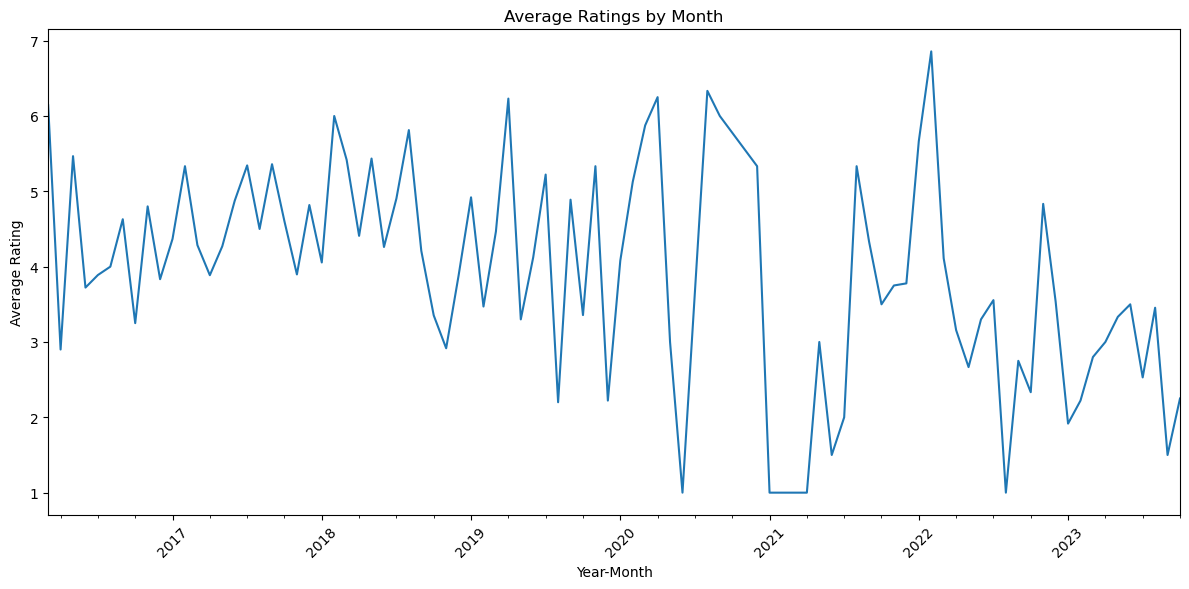

In [170]:
df['year_month'] = df['date'].dt.to_period('M')
monthly_ratings = df.groupby('year_month')['rating'].mean()

plt.figure(figsize=(12, 6))
monthly_ratings.plot()
plt.title('Average Ratings by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Traveller Type Analysis

Let's analyze ratings by traveller type:

In [171]:
avg_rating_traveller = df.groupby('traveller_type')['rating'].mean().reset_index()
avg_rating_traveller

,traveller_type,rating
0,Business,4.193038
1,Couple Leisure,4.251121
2,Family Leisure,3.803468
3,Solo Leisure,4.293814


### Route Analysis

Let's look at the top 10 routes by number of reviews:

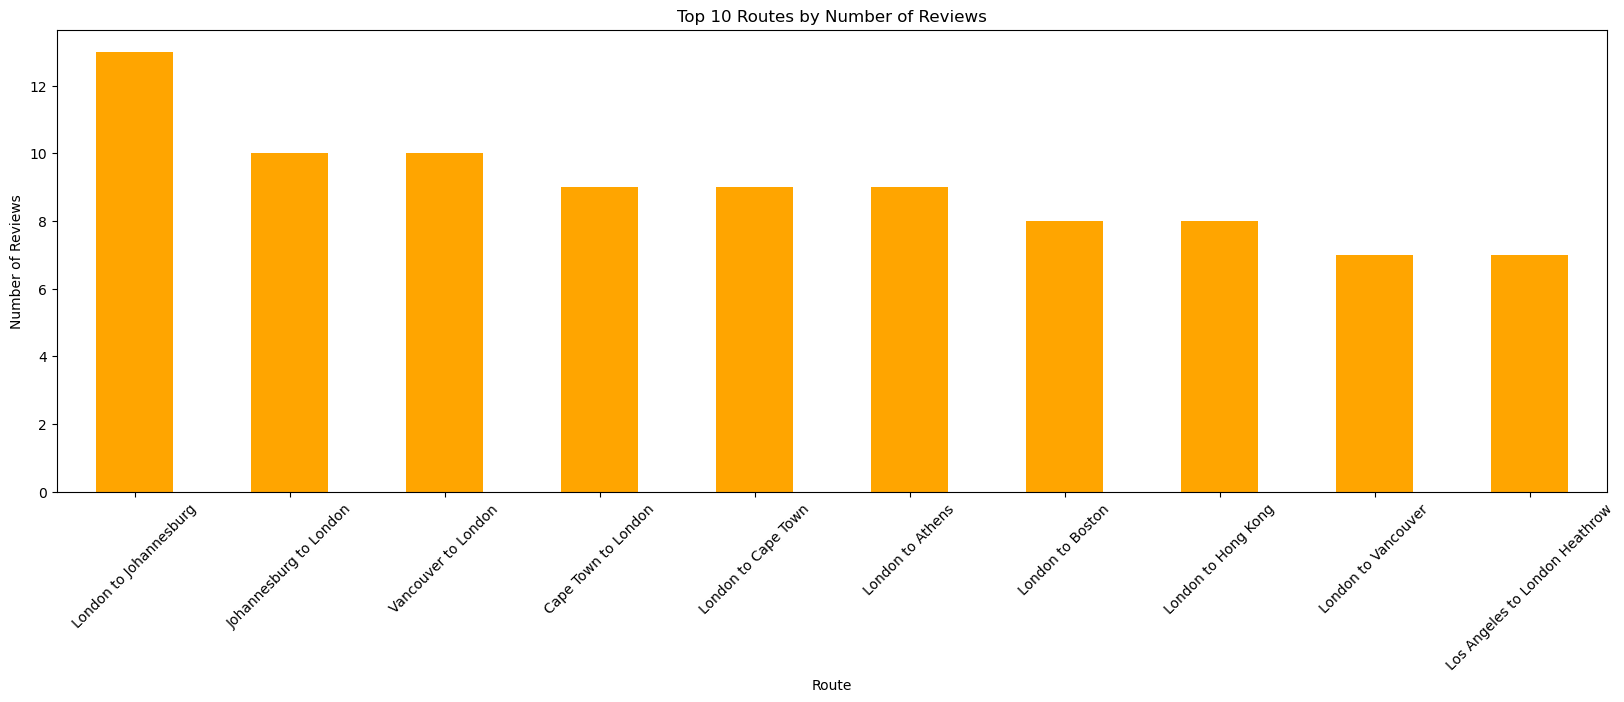

In [172]:
plt.figure(figsize=(20, 6)) 

top_routes = df['route'].value_counts().head(10)
top_routes.plot(kind='bar', color='orange')

plt.title('Top 10 Routes by Number of Reviews')
plt.xlabel('Route')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


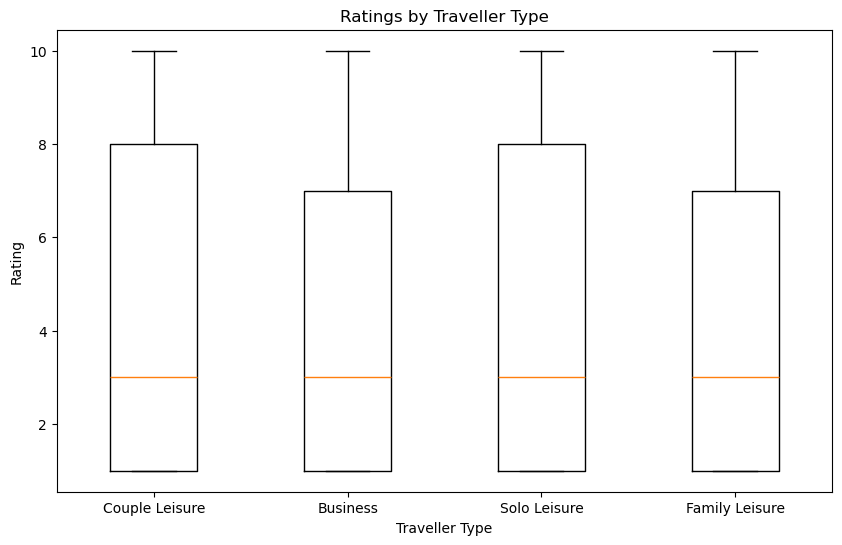

In [173]:
traveller_types = df['traveller_type'].unique()
data_to_plot = [df[df['traveller_type'] == t]['rating'] for t in traveller_types]

plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, labels=traveller_types)
plt.title('Ratings by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Rating')
plt.show()

### Seat Comfort Analysis

Let's analyze seat comfort by seat type:

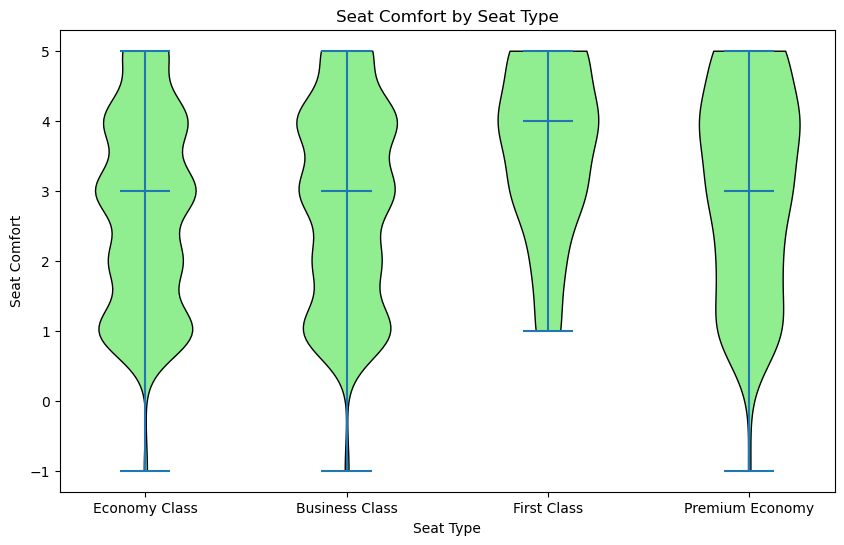

In [174]:
import matplotlib.collections as mcollections

seat_types = df['seat_type'].unique()
data_to_plot = [df[df['seat_type'] == s]['seat_comfort'] for s in seat_types]

fig, ax = plt.subplots(figsize=(10,6))
parts = ax.violinplot(data_to_plot, showmeans=False, showmedians=True)
ax.set_title('Seat Comfort by Seat Type')
ax.set_xlabel('Seat Type')
ax.set_ylabel('Seat Comfort')
ax.set_xticks(np.arange(1, len(seat_types) + 1))
ax.set_xticklabels(seat_types)

for pc in parts['bodies']:
  pc.set_facecolor('lightgreen')
  pc.set_edgecolor('black')
  pc.set_alpha(1)

plt.show()

### Recommendations by Seat Type

Let's visualize recommendations by seat type:

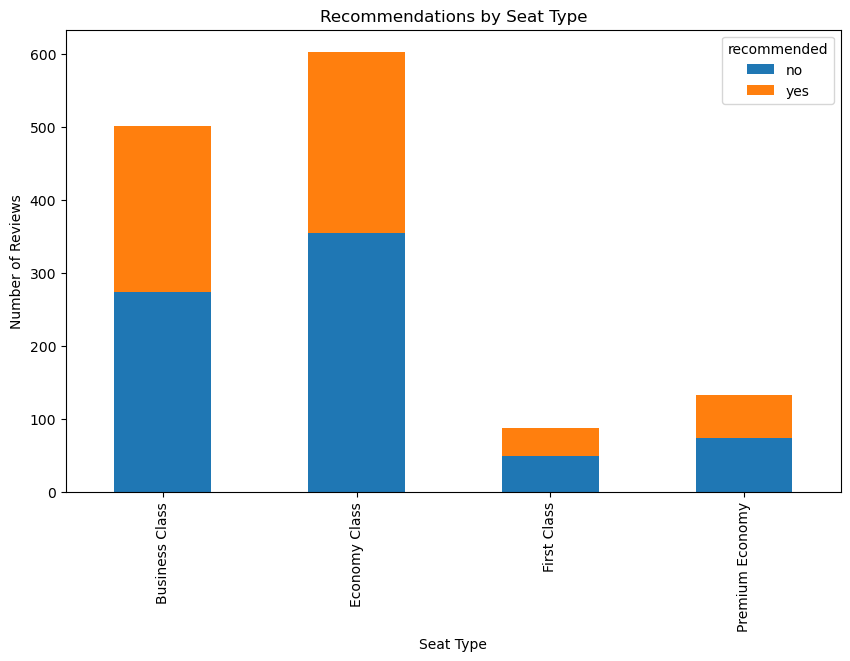

In [175]:
recommend_pivot = df.pivot_table(index='seat_type', columns='recommended', aggfunc='size', fill_value=0)
recommend_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Recommendations by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Number of Reviews')
plt.show()

### Review Frequency Over Time

Let's look at how the number of reviews changes over time:


C:\Users\ostor\AppData\Local\Temp\ipykernel_15904\2362693152.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df.resample('M', on='date').size()


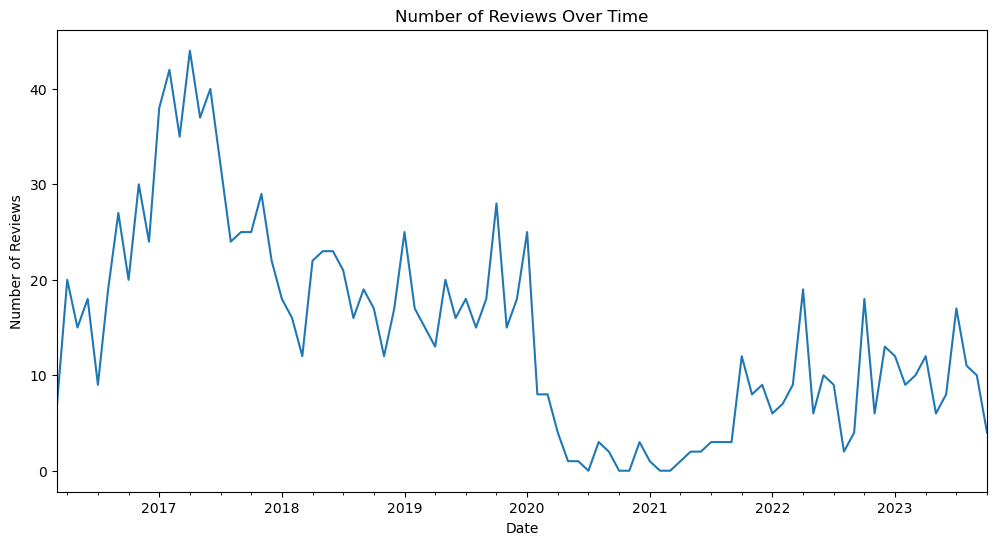

In [176]:
monthly_reviews = df.resample('M', on='date').size()
plt.figure(figsize=(12,6))
monthly_reviews.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

### Top Departure Places

Let's analyze the top departure places by average rating:

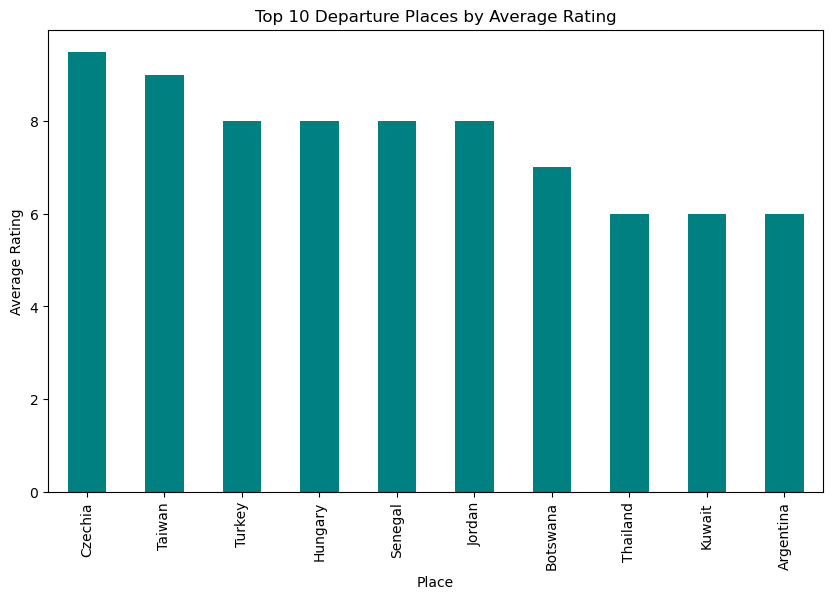

In [177]:
avg_rating_place = df.groupby('place')['rating'].mean().sort_values(ascending=False).head(10)
avg_rating_place.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Top 10 Departure Places by Average Rating')
plt.xlabel('Place')
plt.ylabel('Average Rating')
plt.show()

In [178]:
pivot_table = df.pivot_table(values='rating', index='traveller_type', columns='seat_type', aggfunc='mean')
pivot_table

seat_type,Business Class,Economy Class,First Class,Premium Economy
traveller_type,,,,
Business,4.168919,4.254098,5.277778,3.357143
Couple Leisure,4.113990,4.405556,4.285714,4.184211
Family Leisure,3.833333,3.765306,5.666667,2.583333
Solo Leisure,3.330189,4.699507,3.440000,5.055556


### Statistical Analysis

Let's perform a one-way ANOVA to compare ratings across different seat types:

In [179]:
from scipy.stats import f_oneway


economy_ratings = df[df['seat_type'] == 'Economy Class']['rating']
business_ratings = df[df['seat_type'] == 'Business Class']['rating']
premium_ratings = df[df['seat_type'] == 'Premium Economy']['rating']
first_ratings = df[df['seat_type'] == 'First Class']['rating']


f_stat, p_val = f_oneway(economy_ratings, business_ratings, premium_ratings, first_ratings)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_val}")

ANOVA F-statistic: 1.7641256021310572, P-value: 0.15215780253676953


In [180]:
def calculate_distance(route):

  return np.random.randint(500, 10000)

df['flight_distance'] = df['route'].apply(calculate_distance)

distance_rating_corr = df['flight_distance'].corr(df['rating'])
print(f"Correlation between flight distance and rating: {distance_rating_corr:.4f}")

Correlation between flight distance and rating: 0.0274
